In [1]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

import spacy
import seaborn as sns

In [2]:
consumer_key = "dkJmeyfZH81HSOFfwTdSkST99"
consumer_secret = "p1iv1RpTKj7Uh2wmOwjeqTtxdYpfp28U3RURW7eweBn01DV0LK"
access_token = "1250285356487856128-dSkMsYzWvbCALvpJgj1ZH1vimPmZ3K"
access_token_secret = "n2VqtQmzdRnFGct2SOAw8v0ozsud9zIWclDkaBiVpK3rp"

In [3]:
auth = tweepy.OAuthHandler(consumer_key,consumer_secret) # Create an authentication project
auth.set_access_token(access_token,access_token_secret)  # set the access token and ats 
api = tweepy.API(auth,wait_on_rate_limit = True)    # creating an ap object

In [4]:
api.available_trends()

[{'name': 'Worldwide',
  'placeType': {'code': 19, 'name': 'Supername'},
  'url': 'http://where.yahooapis.com/v1/place/1',
  'parentid': 0,
  'country': '',
  'woeid': 1,
  'countryCode': None},
 {'name': 'Winnipeg',
  'placeType': {'code': 7, 'name': 'Town'},
  'url': 'http://where.yahooapis.com/v1/place/2972',
  'parentid': 23424775,
  'country': 'Canada',
  'woeid': 2972,
  'countryCode': 'CA'},
 {'name': 'Ottawa',
  'placeType': {'code': 7, 'name': 'Town'},
  'url': 'http://where.yahooapis.com/v1/place/3369',
  'parentid': 23424775,
  'country': 'Canada',
  'woeid': 3369,
  'countryCode': 'CA'},
 {'name': 'Quebec',
  'placeType': {'code': 7, 'name': 'Town'},
  'url': 'http://where.yahooapis.com/v1/place/3444',
  'parentid': 23424775,
  'country': 'Canada',
  'woeid': 3444,
  'countryCode': 'CA'},
 {'name': 'Montreal',
  'placeType': {'code': 7, 'name': 'Town'},
  'url': 'http://where.yahooapis.com/v1/place/3534',
  'parentid': 23424775,
  'country': 'Canada',
  'woeid': 3534,
  'co

In [5]:
def get_woeid(place):
    '''Get woeid by location'''
    try:
        trends = api.available_trends()
        for val in trends:
            if (val['name'].lower() == place.lower()):
                return(val['woeid']) 
        print('Location Not Found')
    except Exception as e:
        print('Exception:',e)
        return(0)
      
           
get_woeid('India')

23424848

In [6]:
api.get_place_trends

<bound method API.get_place_trends of <tweepy.api.API object at 0x000002BE0B93AA30>>

In [7]:
def get_trends_by_location(loc_id,count):
    '''Get Trending Tweets by Location'''
    import iso639
    try:
        trends = api.get_place_trends(loc_id)
        df = pd.DataFrame([trending['name'],  trending['tweet_volume']] for trending in trends[0]['trends'])
        df.columns = ['Trends','Volume']
        #df = df.sort_values('Volume', ascending = False)
        return(df[:count])
    except Exception as e:
        print("An exception occurred",e)
        
        
df_india_trends = get_trends_by_location(get_woeid('India'), 10)
df_india_trends

,Trends,Volume
0,#BheemlaNayakTrailer,484823.0
1,#SaveShimogaMuslims,100464.0
2,#Harsha,148454.0
3,#HinduLivesMatters,53285.0
4,HBD CELEB NAINA,NaN
5,#WeStandWithJayakumar,NaN
6,BWood Suicide Scam,21942.0
7,Putin,635278.0
8,Blissful Sushant Singh Rajput,27937.0
9,UN Geneva,NaN


In [24]:
df_india_trends.loc[:,"Trends"]


TypeError: 'RangeIndex' object is not callable

In [28]:
df_world_trends = get_trends_by_location(1, 10) 
df_world_trends

,Trends,Volume
0,#happybirthdayjhope,640025.0
1,#uarourhope,361254.0
2,#HopeRightHere,284788.0
3,#OurEternalHope,154384.0
4,#OurFebruaryMiracle,230199.0
5,stranger things,92789.0
6,Ayuso,333665.0
7,タコピー,68833.0
8,hoseok,377092.0
9,vernon,322093.0


In [36]:
# extarcting tweets from twitter user 
tweets = api.user_timeline(screen_name = "narendramodi",count = 200,lang = "en",tweet_mode = "extended")

print ("Show  5 recent tweets: \n")
for tweet in tweets[0:5]:
    print(tweet.full_text + "\n")

Unexpected parameter: lang


Show  5 recent tweets: 

Talking about how this year’s Budget will give a boost to the crucial education sector. https://t.co/c4YpiOKL2S

At 11 AM today, will be addressing a webinar on how this year’s Union Budget will have a positive impact on the education sector.

গান্ধীবাদী আদৰ্শৰ প্ৰচাৰৰ ক্ষেত্ৰত কৰা  জীৱনজোৰা প্ৰয়াসৰ বাবে শকুন্তলা চৌধুৰী  চিৰস্মৰণীয় হৈ ৰ'ব। শৰণীয়া আশ্ৰমত তেওঁৰ মহান কামে বহু লোকৰ জীৱনত যোগাত্মক প্ৰভাৱ  পেলাইছিল। তেওঁৰ মৃত্যুৰ বাতৰিয়ে দুঃখিত কৰিছে। তেওঁৰ পৰিয়াল আৰু শুভাকাংক্ষীসকললৈ সমবেদনা জনাইছো। ঔম শান্তি।

Shakuntala Choudhary Ji will be remembered for her lifelong efforts to promote Gandhian values. Her noble work at the Sarania Ashram positively impacted many lives. Saddened by her passing away. My thoughts are with her family and countless admirers. Om Shanti.

I wish Her Majesty Queen Elizabeth a speedy recovery and pray for her good health. https://t.co/Em873ikLl8



In [37]:
tweets[0].full_text

'Talking about how this year’s Budget will give a boost to the crucial education sector. https://t.co/c4YpiOKL2S'

In [38]:
# creating a dataframe
df = pd.DataFrame([tweet.full_text for tweet in tweets],columns = ["Tweets"])
df

,Tweets
0,Talking about how this year’s Budget will give...
1,"At 11 AM today, will be addressing a webinar o..."
2,গান্ধীবাদী আদৰ্শৰ প্ৰচাৰৰ ক্ষেত্ৰত কৰা জীৱনজো...
3,Shakuntala Choudhary Ji will be remembered for...
4,I wish Her Majesty Queen Elizabeth a speedy re...
...,...
195,"మహోన్నతులైన సత్పురుషులు, దార్శనికులు, స్పూర్తి..."
196,Telugu culture has been enriched by noble Sain...
197,आज देश में एक ओर सरदार साहब की ‘Statue of Unit...
198,Important lessons from the life of Sri Ramanuj...


In [39]:
# function to clean the tweets 
def cleantweets(text):
    text = re.sub(r"@[A-Za-z0-9]+","",text)     # remove the @mentions
    text = re.sub(r"#","",text)                 # remove the # symbol
    text = re.sub(r"RT[\s]","",text)            # removing retweets
    text = re.sub(r"https:\/\/\S+","",text)    # remove the hyperlink
    return text

In [40]:
df["Tweets"] = df["Tweets"].apply(cleantweets)
df

,Tweets
0,Talking about how this year’s Budget will give...
1,"At 11 AM today, will be addressing a webinar o..."
2,গান্ধীবাদী আদৰ্শৰ প্ৰচাৰৰ ক্ষেত্ৰত কৰা জীৱনজো...
3,Shakuntala Choudhary Ji will be remembered for...
4,I wish Her Majesty Queen Elizabeth a speedy re...
...,...
195,"మహోన్నతులైన సత్పురుషులు, దార్శనికులు, స్పూర్తి..."
196,Telugu culture has been enriched by noble Sain...
197,आज देश में एक ओर सरदार साहब की ‘Statue of Unit...
198,Important lessons from the life of Sri Ramanuj...


In [41]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [42]:
df["Subjectivity"] = df["Tweets"].apply(getSubjectivity)
df["Polarity"] = df["Tweets"].apply(getPolarity)

In [43]:
df

,Tweets,Subjectivity,Polarity
0,Talking about how this year’s Budget will give...,1.000000,0.000000
1,"At 11 AM today, will be addressing a webinar o...",0.545455,0.227273
2,গান্ধীবাদী আদৰ্শৰ প্ৰচাৰৰ ক্ষেত্ৰত কৰা জীৱনজো...,0.000000,0.000000
3,Shakuntala Choudhary Ji will be remembered for...,0.609091,0.245455
4,I wish Her Majesty Queen Elizabeth a speedy re...,0.600000,0.700000
...,...,...,...
195,"మహోన్నతులైన సత్పురుషులు, దార్శనికులు, స్పూర్తి...",0.000000,0.000000
196,Telugu culture has been enriched by noble Sain...,0.546667,0.333333
197,आज देश में एक ओर सरदार साहब की ‘Statue of Unit...,0.000000,0.000000
198,Important lessons from the life of Sri Ramanuj...,1.000000,0.400000


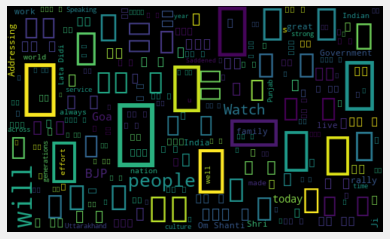

In [44]:
allWords = "".join([twts for twts in df["Tweets"]])
wordCloud = WordCloud(width = 500,height = 300,random_state = 21,max_font_size = 119).generate(allWords)
plt.imshow(wordCloud,interpolation = "bilinear")
plt.axis("off")
plt.show()

In [45]:
def getAnalysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
df["Analysis"] = df["Polarity"].apply(getAnalysis)
df

,Tweets,Subjectivity,Polarity,Analysis
0,Talking about how this year’s Budget will give...,1.000000,0.000000,Neutral
1,"At 11 AM today, will be addressing a webinar o...",0.545455,0.227273,Positive
2,গান্ধীবাদী আদৰ্শৰ প্ৰচাৰৰ ক্ষেত্ৰত কৰা জীৱনজো...,0.000000,0.000000,Neutral
3,Shakuntala Choudhary Ji will be remembered for...,0.609091,0.245455,Positive
4,I wish Her Majesty Queen Elizabeth a speedy re...,0.600000,0.700000,Positive
...,...,...,...,...
195,"మహోన్నతులైన సత్పురుషులు, దార్శనికులు, స్పూర్తి...",0.000000,0.000000,Neutral
196,Telugu culture has been enriched by noble Sain...,0.546667,0.333333,Positive
197,आज देश में एक ओर सरदार साहब की ‘Statue of Unit...,0.000000,0.000000,Neutral
198,Important lessons from the life of Sri Ramanuj...,1.000000,0.400000,Positive


In [46]:
sortedDF = df.sort_values(by = ["Polarity"])
sortedDF

,Tweets,Subjectivity,Polarity,Analysis
166,"Driven by mindless hate and frustration, some ...",0.800000,-0.400000,Negative
92,I am shocked by statements of TMC leaders who ...,0.650000,-0.350000,Negative
180,Empty slogans of ‘Gareebi Hatao’ were not able...,0.545000,-0.270000,Negative
79,The passing away of Gitashree Sandhya Mukhopad...,0.700000,-0.175000,Negative
145,The conventional notions of anti-incumbency do...,0.357143,-0.142857,Negative
...,...,...,...,...
14,Best wishes to the people of Arunachal Pradesh...,0.377273,0.568182,Positive
121,Addressing a huge rally in Almora. Great enthu...,0.825000,0.600000,Positive
4,I wish Her Majesty Queen Elizabeth a speedy re...,0.600000,0.700000,Positive
56,Addressing a rally in Punjab. Great support fo...,0.750000,0.800000,Positive


In [47]:
sortedDF.head(1)['Tweets'].values[0]

'Driven by mindless hate and frustration, some Opposition MPs have mocked India’s vaccination drive. Such politics is deplorable. \n\nI want to assure everyone that we will leave no stone unturned to protect the lives of 130 crore Indians. '

In [49]:
cdv =  df.sort_values(by = ["Polarity"],ascending = False)
cdv.head(1)['Tweets'].values[0]

'Addressing a rally in Punjab. Great support for NDA. '

In [62]:
user_description = tweets.user.description


AttributeError: 'ResultSet' object has no attribute 'user'

In [22]:
j = 1
sortedDF = df.sort_values(by = ["Polarity"])
for i in range(0,sortedDF.shape[0]):
    if(sortedDF["Analysis"][i] == "Positive"):
        print(str(j)+". "+sortedDF["Tweets"][i])
        print()
        j = j+1

1. At 11 AM today, will be addressing a webinar on how this year’s Union Budget will have a positive impact on the education sector.

2. Shakuntala Choudhary Ji will be remembered for her lifelong efforts to promote Gandhian values. Her noble work at the Sarania Ashram positively impacted many lives. Saddened by her passing away. My thoughts are with her family and countless admirers. Om Shanti.

3. I wish Her Majesty Queen Elizabeth a speedy recovery and pray for her good health. 

4. Best wishes to the people of Arunachal Pradesh on their Statehood Day. The people of the state are known for their stupendous talent and hardworking nature. May the state scale new heights of development in the times to come.

5. Greetings to the people of Mizoram on their Statehood Day. India takes great pride in the vibrant Mizo culture and the contributions of Mizoram to national progress. I pray for the good health and well-being of the people of Mizoram.

6. The Punjab elections and the third phase 

In [64]:
sortedDF["Tweets"][2]

"গান্ধীবাদী আদৰ্শৰ প্ৰচাৰৰ ক্ষেত্ৰত কৰা  জীৱনজোৰা প্ৰয়াসৰ বাবে শকুন্তলা চৌধুৰী  চিৰস্মৰণীয় হৈ ৰ'ব। শৰণীয়া আশ্ৰমত তেওঁৰ মহান কামে বহু লোকৰ জীৱনত যোগাত্মক প্ৰভাৱ  পেলাইছিল। তেওঁৰ মৃত্যুৰ বাতৰিয়ে দুঃখিত কৰিছে। তেওঁৰ পৰিয়াল আৰু শুভাকাংক্ষীসকললৈ সমবেদনা জনাইছো। ঔম শান্তি।"

In [19]:
sortedDF1 = df.sort_values(by = ["Polarity"],ascending = "False")
sortedDF1

,Tweets,Subjectivity,Polarity,Analysis
92,I am shocked by statements of TMC leaders who ...,0.650000,-0.350000,Negative
79,The passing away of Gitashree Sandhya Mukhopad...,0.700000,-0.175000,Negative
145,The conventional notions of anti-incumbency do...,0.357143,-0.142857,Negative
45,"This morning, I met a wide range of people fro...",0.400000,-0.100000,Negative
27,"At 1 PM, will be inaugurating the municipal so...",0.025000,-0.100000,Negative
...,...,...,...,...
131,The bond between BJP and Goa is very strong. W...,0.953333,0.563333,Positive
14,Best wishes to the people of Arunachal Pradesh...,0.377273,0.568182,Positive
121,Addressing a huge rally in Almora. Great enthu...,0.825000,0.600000,Positive
4,I wish Her Majesty Queen Elizabeth a speedy re...,0.600000,0.700000,Positive


In [20]:
j = 1
sortedDF = df.sort_values(by = ["Polarity"],ascending = "False")
for i in range(0,sortedDF.shape[0]):
    if(sortedDF["Analysis"][i] == "Negative"):
        print(str(j)+". "+sortedDF["Tweets"][i])
        print()
        j = j+1

1. Inaugurating a solid waste based Gobar Dhan plant in Indore. 

2. At 1 PM, will be inaugurating the municipal solid waste based Gobar-Dhan plant in Indore. 

This is a commendable effort to ensure cleaner urban spaces under the principle of Waste to Wealth. 

3. This morning, I met a wide range of people from the Sant Samaj and Sikh community. These are distinguished individuals who are at the forefront of popularising Sikh culture and serving society. 

4. The passing away of Gitashree Sandhya Mukhopadhyay Ji leaves us all extremely saddened. Our cultural world is a lot poorer. Her melodious renditions will continue to enthral the coming generations. My thoughts are with her family and admirers in this sad hour. Om Shanti.

5. I am shocked by statements of TMC leaders who say that their intention is to divide Hindu votes. 

Such politics has no place in our country. 

6. The conventional notions of anti-incumbency don’t work while evaluating BJP Governments. 

Based on our track re

In [73]:
final_df = pd.DataFrame(df["Analysis"].value_counts())
final_df.index

Index(['Neutral', 'Positive', 'Negative'], dtype='object')

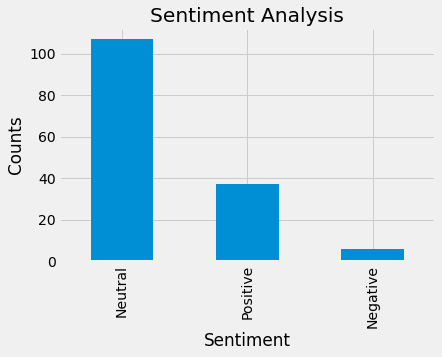

In [33]:
df["Analysis"].value_counts()
plt.title("Sentiment Analysis")
plt.xlabel("Sentiment")
plt.ylabel("Counts")
df["Analysis"].value_counts().plot(kind = "bar")
plt.show()
plt.ge

In [34]:
list_of_sentences = [sentence for sentence in df.Tweets]

lines = []
for sentence in list_of_sentences:
    words = sentence.split()
    for w in words:
        lines.append(w)

In [35]:
lines = [re.sub(r"[^A-Za-z0-9]+","",x) for x in lines]

lines2 = []

for word in lines:
    if word!= "":
        lines2.append(word)

In [36]:
from nltk.stem.snowball import SnowballStemmer

s_stemmer = SnowballStemmer(language = "english")

stem = []
for word in lines2:
    stem.append(s_stemmer.stem(word))

In [37]:
stem

['talk',
 'about',
 'how',
 'this',
 'year',
 'budget',
 'will',
 'give',
 'a',
 'boost',
 'to',
 'the',
 'crucial',
 'educ',
 'sector',
 'at',
 '11',
 'am',
 'today',
 'will',
 'be',
 'address',
 'a',
 'webinar',
 'on',
 'how',
 'this',
 'year',
 'union',
 'budget',
 'will',
 'have',
 'a',
 'posit',
 'impact',
 'on',
 'the',
 'educ',
 'sector',
 'shakuntala',
 'choudhari',
 'ji',
 'will',
 'be',
 'rememb',
 'for',
 'her',
 'lifelong',
 'effort',
 'to',
 'promot',
 'gandhian',
 'valu',
 'her',
 'nobl',
 'work',
 'at',
 'the',
 'sarania',
 'ashram',
 'posit',
 'impact',
 'mani',
 'live',
 'sadden',
 'by',
 'her',
 'pass',
 'away',
 'my',
 'thought',
 'are',
 'with',
 'her',
 'famili',
 'and',
 'countless',
 'admir',
 'om',
 'shanti',
 'i',
 'wish',
 'her',
 'majesti',
 'queen',
 'elizabeth',
 'a',
 'speedi',
 'recoveri',
 'and',
 'pray',
 'for',
 'her',
 'good',
 'health',
 'live',
 'euphor',
 'atmospher',
 'in',
 'hardoi',
 'watch',
 'my',
 'messag',
 'on',
 'the',
 'statehood',
 'day'

In [38]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
stopWords = set(stopwords.words('english'))
stem1 = []
for w in stem:
    if w not in stopWords:
        stem1.append(w)
print(stem1)

['talk', 'year', 'budget', 'give', 'boost', 'crucial', 'educ', 'sector', '11', 'today', 'address', 'webinar', 'year', 'union', 'budget', 'posit', 'impact', 'educ', 'sector', 'shakuntala', 'choudhari', 'ji', 'rememb', 'lifelong', 'effort', 'promot', 'gandhian', 'valu', 'nobl', 'work', 'sarania', 'ashram', 'posit', 'impact', 'mani', 'live', 'sadden', 'pass', 'away', 'thought', 'famili', 'countless', 'admir', 'om', 'shanti', 'wish', 'majesti', 'queen', 'elizabeth', 'speedi', 'recoveri', 'pray', 'good', 'health', 'live', 'euphor', 'atmospher', 'hardoi', 'watch', 'messag', 'statehood', 'day', 'arunach', 'pradesh', 'best', 'wish', 'peopl', 'arunach', 'pradesh', 'statehood', 'day', 'peopl', 'state', 'known', 'stupend', 'talent', 'hardwork', 'natur', 'may', 'state', 'scale', 'new', 'height', 'develop', 'time', 'come', 'greet', 'peopl', 'mizoram', 'statehood', 'day', 'india', 'take', 'great', 'pride', 'vibrant', 'mizo', 'cultur', 'contribut', 'mizoram', 'nation', 'progress', 'pray', 'good', 'he

In [39]:
df2 = pd.DataFrame(stem1)
df2 = df2[0].value_counts()

C:\Users\91860\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


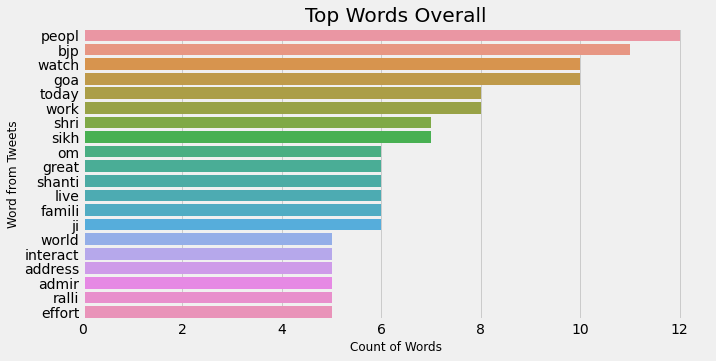

In [40]:
df2 = df2[:20,]
plt.figure(figsize = (10,5))
sns.barplot(df2.values,df2.index,alpha = 1)
plt.title("Top Words Overall")
plt.ylabel("Word from Tweets",fontsize = 12)
plt.xlabel("Count of Words",fontsize = 12)
plt.show()

In [41]:
import en_core_web_sm
nlp = en_core_web_sm.load()

In [42]:
def show_ents(doc):
    if doc.ents:
        for ent in doc.ents:
            print(ent.text + " - " + ent.label_ + " - " + str(spacy.explain(ent.label_)))

In [43]:
str1 = " "
stem2 = str1.join(lines2)
stem2 = nlp(stem2)
label = [(X.text,X.label_) for X in stem2.ents]
df6 = pd.DataFrame(label,columns = ["Word","Entity"])
df7 = df6.where(df6["Entity"] == "ORG")
df7 = df7["Word"].value_counts()

C:\Users\91860\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


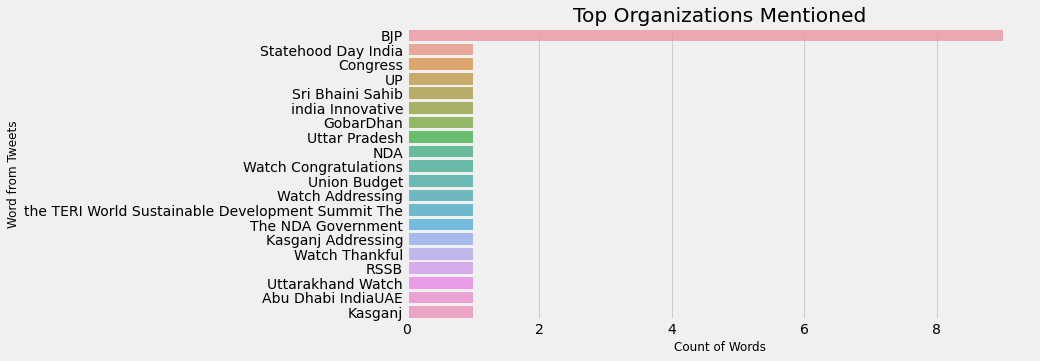

In [44]:
df = df7[:20,]
plt.figure(figsize = (10,5))
sns.barplot(df.values,df.index,alpha = 0.8)
plt.title("Top Organizations Mentioned")
plt.ylabel("Word from Tweets",fontsize = 12)
plt.xlabel("Count of Words",fontsize = 12)
plt.show()

In [45]:
str11 = " "
stem22 = str11.join(lines2)
stem22= nlp(stem22)
label = [(X.text,X.label_) for X in stem22.ents]
df10 = pd.DataFrame(label,columns = ["Word","Entity"])
df10= df10.where(df6["Entity"] == "PERSON")
df11 = df10["Word"].value_counts()

C:\Users\91860\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


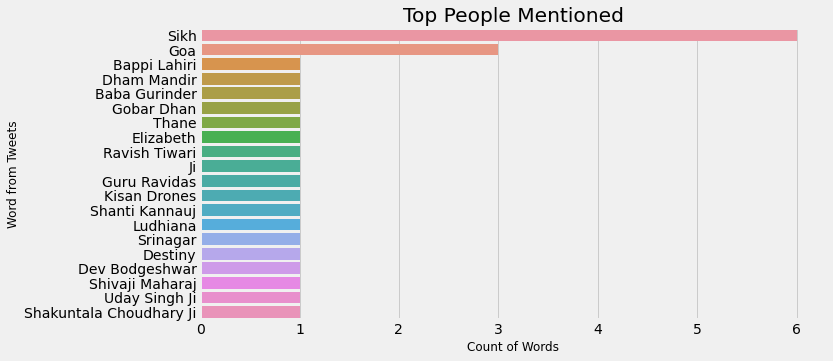

In [46]:
dfy = df11[:20,]
plt.figure(figsize = (10,5))
sns.barplot(dfy.values,dfy.index,alpha = 1)
plt.title("Top People Mentioned")
plt.ylabel("Word from Tweets",fontsize = 12)
plt.xlabel("Count of Words",fontsize = 12)
plt.show()